# Avocado Project

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here’s how the Hass Avocado Board describes the data on their website:

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. green skins) are not included in this table.

The avocado, a tree likely originating from south-central Mexico, is classified as a member of the flowering plant family Lauraceae. The fruit of the plant, also called an avocado, is botanically a large berry containing a single large seed.

Problem description:

The goal is to predict the average price which is continuous in nature of the different type of avocado and using the region that in which region they are lying.

# Importing the libraries

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset into variable

In [4]:
df=pd.read_csv(r"C:\Users\alivi\Desktop\Dataset\avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Here I am loading the data set into a variable i.e. “df” and processing the first 5 rows. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


 As in this data set most of the column are float in nature and type.



This method print the information about the DataFrame including the index type and column type,non-null values and memory usage.

In [8]:
#checking the shape
df.shape

(18249, 14)

Dataset contains 18249 rows and 14 columns.

In [9]:
#checking the columns
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [11]:
#droping the Unnamed: 0 column cause it has no effect on the dataset
df.drop('Unnamed: 0',inplace=True,axis=1)

In [12]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [14]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [15]:
#checking the datatypes
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Most of the column are of same data type that is float and Date, type and region is of object data type.

<AxesSubplot:>

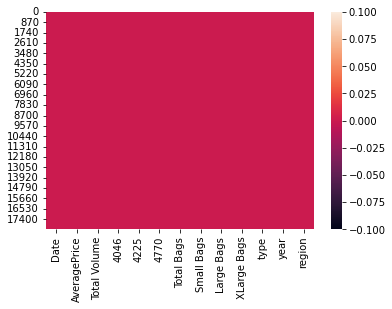

In [16]:
#checking the null value using heatmap
sns.heatmap(df.isnull())

There are no null values in the data set because the red color is distributed equally correspond to each column.

# Summary Statistics

In [17]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction

1. The number of rows in each column are same, means there are no null values in the data set.
2. The mean and 50%value of most of the column are same and the STD and mean are very close to each other.
3. Most of the column statistics data are near to 0 values.
4. By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

# Data Visualization:

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

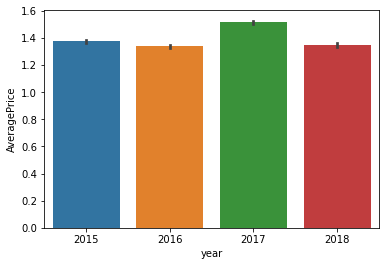

In [19]:
#checking ratio of year and price that which year had max average price
sns.barplot(x="year",y="AveragePrice",data=df)

So, the above graph shows that 2017 is the highest year where maximum price is there.

<AxesSubplot:xlabel='Date', ylabel='count'>

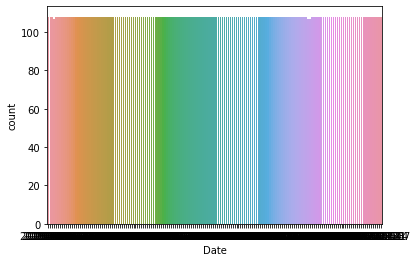

In [22]:
sns.countplot(df['Date'])

Data is normally distributed

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

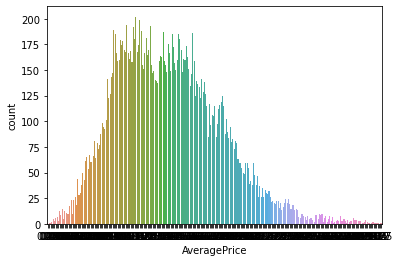

In [23]:
sns.countplot(df['AveragePrice'])

Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='Total Volume', ylabel='count'>

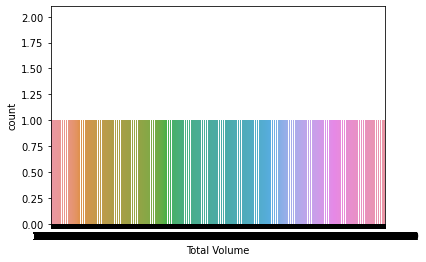

In [24]:
sns.countplot(df['Total Volume'])

Data is normally distributed

<AxesSubplot:xlabel='4046', ylabel='count'>

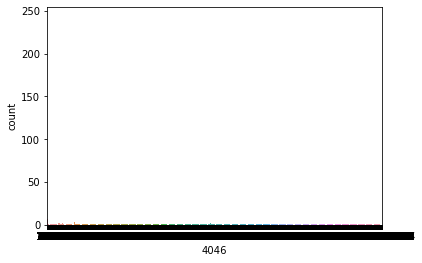

In [25]:
sns.countplot(df['4046'])

<AxesSubplot:xlabel='type', ylabel='count'>

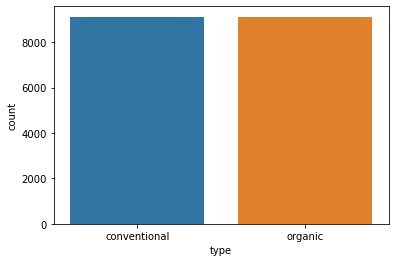

In [26]:
 sns.countplot(df['type'])

Data is normally distributed in the all columns.

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

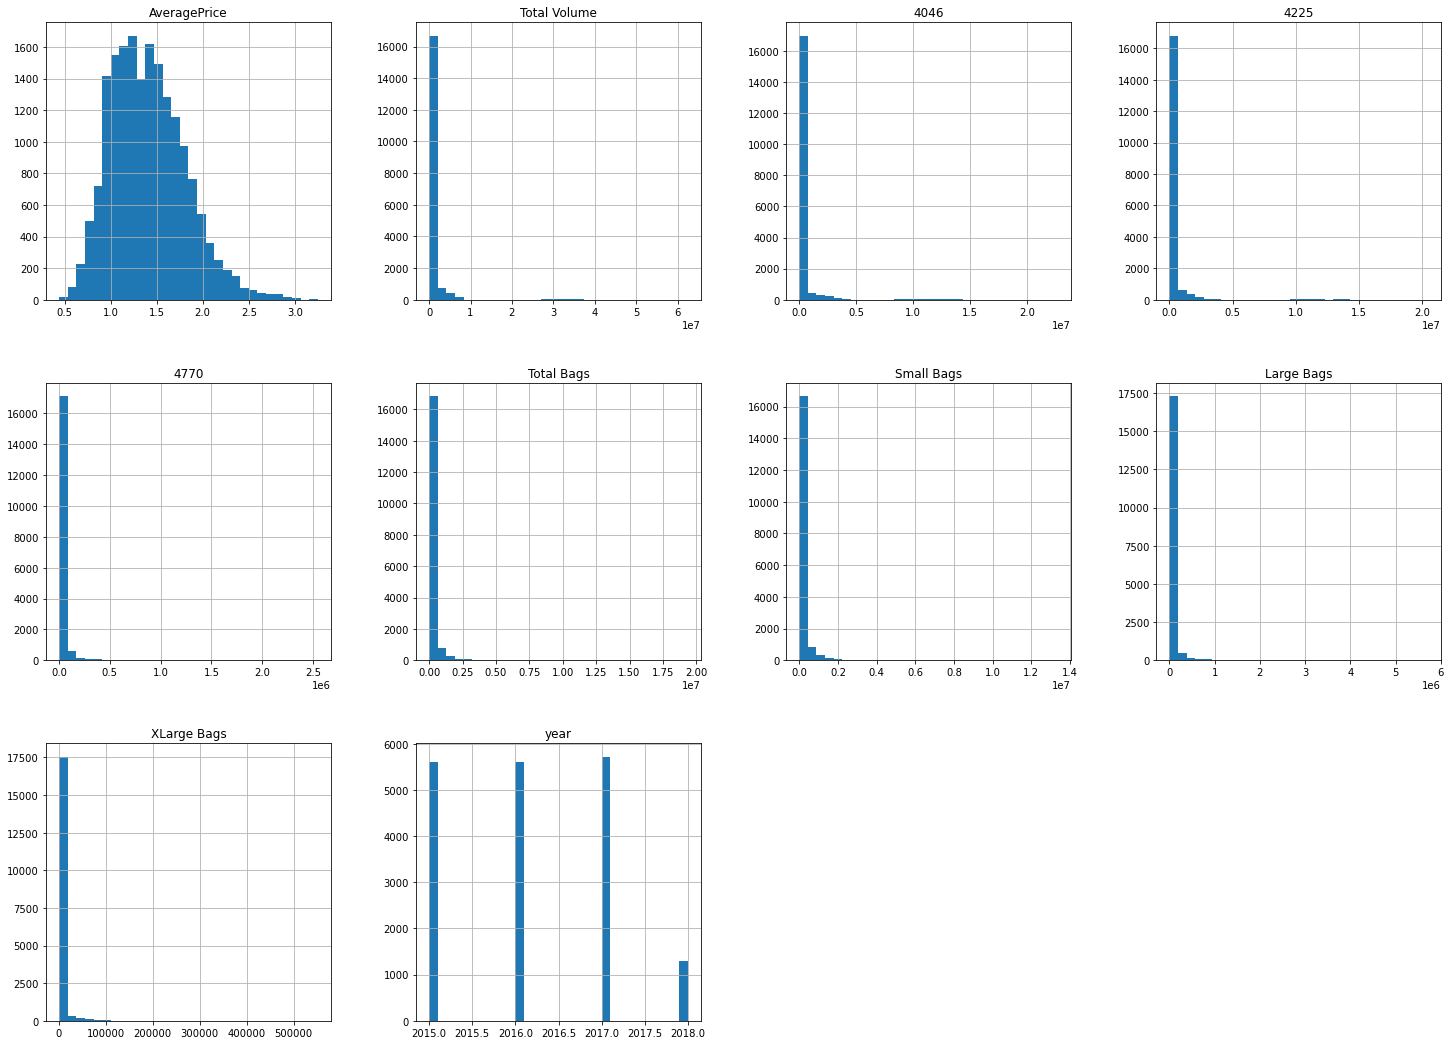

In [31]:
#plotting histogram for univariate analysis and checking the normal distribution
df.hist(figsize=(25,25),grid = True, layout=(4,4), bins=30)

From the aboves figures we can say that the Average price column is normally distributing over the histogram.
Rest of the data are not much varying in term of numbers, so they are almost left skewed data
To make the column as normal distributed we can use different methods, but I am using numPy log to make the skew values as normal distributed.


# Correlation

In [34]:
dfcor=df.corr()
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


<AxesSubplot:>

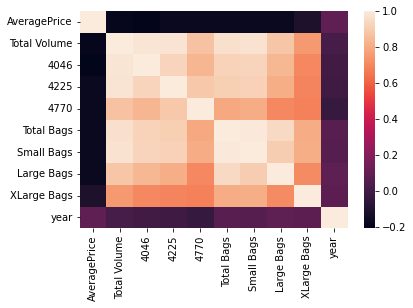

In [35]:
#checking with heatmap
sns.heatmap(dfcor)

Here heatmap containes the difference of corresponding values of dataset.

Light shades are higly corrolated

<AxesSubplot:>

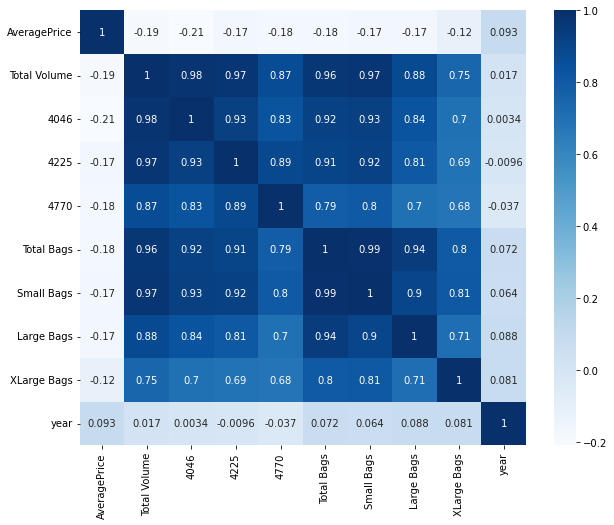

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,cmap='Blues',annot=True)

Dark shades are higly correlated

<AxesSubplot:>

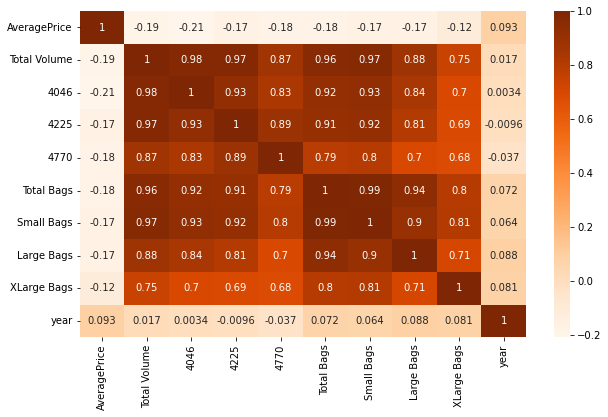

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Oranges',annot=True)


Light shades are higly correlated

year is higly correlated with Xlargebags

xlargebags is highly negatively correlated with smallbags

smallbags is higly positively correlated with averageprice

averageprice is negatively correlated with year

# Outliers

AveragePrice       AxesSubplot(0.125,0.749828;0.110714x0.130172)
Total Volume    AxesSubplot(0.257857,0.749828;0.110714x0.130172)
4046            AxesSubplot(0.390714,0.749828;0.110714x0.130172)
4225            AxesSubplot(0.523571,0.749828;0.110714x0.130172)
4770            AxesSubplot(0.656429,0.749828;0.110714x0.130172)
Total Bags      AxesSubplot(0.789286,0.749828;0.110714x0.130172)
Small Bags         AxesSubplot(0.125,0.593621;0.110714x0.130172)
Large Bags      AxesSubplot(0.257857,0.593621;0.110714x0.130172)
XLarge Bags     AxesSubplot(0.390714,0.593621;0.110714x0.130172)
year            AxesSubplot(0.523571,0.593621;0.110714x0.130172)
dtype: object

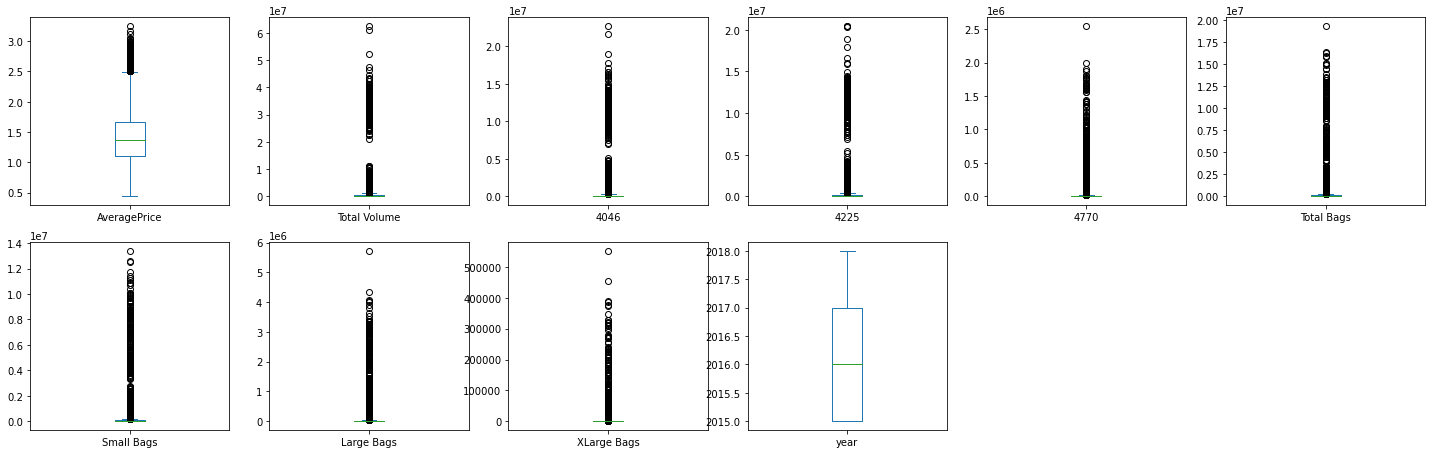

In [44]:
#plotting the boxplot of each column to check the outliers
df.plot(kind='box', subplots=True, layout=(5,6), figsize=(25,20))

From above image we can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.

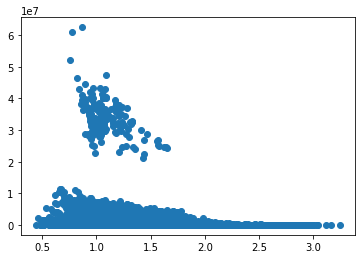

In [45]:
#removing the missing values
plt.scatter(df['AveragePrice'],df['Total Volume'])
plt.show()

Here is the scattering plot of averageprice and total volume

In [46]:
#drop the nagativitycorrelated columns.
df.drop('Total Bags',axis=1,inplace=True)

In [47]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany


# Encoding Method

In [48]:
LE=LabelEncoder()
df['year']=LE.fit_transform(df['year'])

In [49]:
df["year"].unique()

array([0, 1, 2, 3], dtype=int64)

In [50]:
LE=LabelEncoder()
df['region']=LE.fit_transform(df['region'])

df["region"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [51]:
LE=LabelEncoder()
df['type']=LE.fit_transform(df['type'])

df["type"].unique()

array([0, 1])

In [52]:
LE=LabelEncoder()
df['Date']=LE.fit_transform(df['Date'])

In [53]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,0
4,47,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,0


In [55]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

# Removing Outliers

In [57]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.676360,0.188689,0.227716,0.230816,0.199902,0.212091,0.232647,0.222352,0.17558,0.999836,1.221282,1.700252
1,0.696857,0.139020,0.230427,0.231103,0.208054,0.211997,0.231568,0.222335,0.17558,0.999836,1.221282,1.700252
2,0.717355,1.182069,0.212085,0.231007,0.154478,0.211325,0.233399,0.222311,0.17558,0.999836,1.221282,1.700252
3,0.737853,0.809551,0.223444,0.230741,0.185350,0.211864,0.236568,0.222186,0.17558,0.999836,1.221282,1.700252
4,0.758350,0.312861,0.231538,0.230891,0.208719,0.211834,0.236154,0.221924,0.17558,0.999836,1.221282,1.700252
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.578371,0.556347,0.241373,0.230017,0.243857,0.212540,0.226665,0.220964,0.17558,1.000164,1.970504,1.700811
18245,1.557874,0.755023,0.242296,0.230693,0.242277,0.212540,0.232196,0.221403,0.17558,1.000164,1.970504,1.700811
18246,1.537376,1.152375,0.242331,0.230693,0.243090,0.205766,0.231644,0.222561,0.17558,1.000164,1.970504,1.700811
18247,1.516879,1.301382,0.241625,0.230428,0.242651,0.205774,0.229543,0.222529,0.17558,1.000164,1.970504,1.700811


In [58]:
#putting the threshold as 3
threshold=3
print(np.where(z>3))


(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([3, 3, 8, ..., 1, 1, 1], dtype=int64))


In [59]:
df_new=df[(z<3).all(axis=1)]
df_new

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,0
4,47,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,1.63,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,3,53
18245,160,1.71,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,3,53
18246,159,1.87,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,3,53
18247,158,1.93,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,3,53


In [60]:
#checking the shape before removing outliers
df.shape

(18249, 12)

In [61]:
#checking the shape of the dataset after removing outliers
df_new.shape

(17651, 12)

In [62]:
#percentage for the loss of data
Data_loss=((18249-17651)/18249)*100
Data_loss

3.276891884486821

# StandardScaler Method

In [64]:
from sklearn.preprocessing import StandardScaler #importing standardscaler library

scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [65]:
scaledX

array([[-0.67635986, -0.18868864, -0.22771641, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.69685742, -0.13901962, -0.23042664, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.71735497, -1.18206895, -0.21208462, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       ...,
       [ 1.53737632,  1.15237477, -0.24233073, ...,  1.00016441,
         1.97050371,  1.70081131],
       [ 1.51687877,  1.30138182, -0.24162464, ...,  1.00016441,
         1.97050371,  1.70081131],
       [ 1.49638121,  0.53151208, -0.24125273, ...,  1.00016441,
         1.97050371,  1.70081131]])

In [66]:
from sklearn.decomposition import PCA #importing PCA(Principal component Analysis) library from sklearn 

testpca = PCA()
Y = testpca.fit(scaledX)

In [67]:
Y.explained_variance_ratio_

array([5.15378722e-01, 1.67735704e-01, 1.22516891e-01, 8.15071172e-02,
       3.35950693e-02, 3.17829509e-02, 2.43867383e-02, 1.08660866e-02,
       5.31377014e-03, 3.92446310e-03, 2.99248753e-03, 1.29253634e-11])

In [68]:
var_cumu = np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 51.53787222,  68.31144261,  80.56313169,  88.71384341,
        92.07335034,  95.25164543,  97.69031926,  98.77692792,
        99.30830494,  99.70075125, 100.        , 100.        ])

In [69]:
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 8


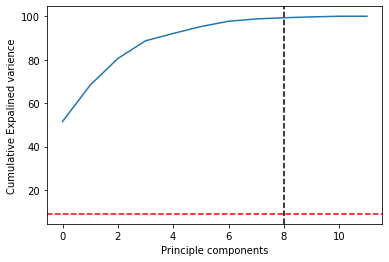

In [70]:
#plotting the Cumulative Experienced Diagram 
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

# Data Visualization of Varience

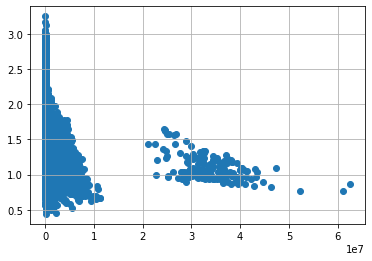

In [71]:
var = 'Total Volume'
plt.scatter(x = df[var],y = df['AveragePrice'],)
plt.grid(True)

Here different varience of total volume and averageprice

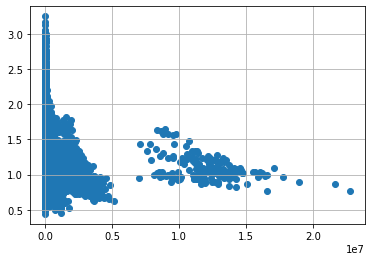

In [72]:
var = '4046'
plt.scatter(x = df[var],y = df['AveragePrice'],)
plt.grid(True)

Here different varience of 4046 and aveargeprice

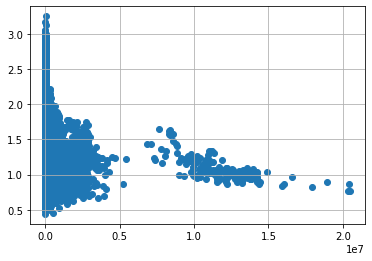

In [74]:
var = '4225'
plt.scatter(x = df[var],y = df['AveragePrice'],)
plt.grid(True)

Here different varience of 4225 and aveargeprice

# Missing Value Treatments

In [75]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Here dataset contains the sum values will be zeros

In [76]:
df["AveragePrice"]=df["AveragePrice"].fillna(df["AveragePrice"].mean())
df["Total Volume"]=df["Total Volume"].fillna(df["Total Volume"].median())

In [77]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Skewness

In [78]:
#checking the skewness
df.skew()

Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

# Final model process

In [79]:
x_train=df.drop("AveragePrice",axis=1)
y_train=df["AveragePrice"]

In [80]:
x_train.head()

,Date,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,0
1,50,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,0
2,49,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,0
3,48,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,0
4,47,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,0


In [81]:
y_train.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [82]:
#checking the shape
x_train.shape

(18249, 11)

In [83]:
y_train.shape


(18249,)

In [84]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [85]:
x=df.drop(["AveragePrice"],axis=1)
y=df["AveragePrice"]
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=50, test_size=0.2)

In [87]:
from sklearn.metrics import mean_squared_error
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
    from sklearn.tree import DecisionTreeRegressor
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(rmse)

0.181343086629993
0.17986372314646884
0.1818796079301413
0.1796444738540581
0.17975333174651478
0.18034122907452302
0.18069144213347232
0.1834283854880147
0.18035512912789511
0.1810179738294379
0.18245427274754522
0.180399708410298
0.17774970859078668
0.18181067979541585
0.18122051956753893
0.1827326065031965
0.17837354985443113
0.18230840947247484
0.1812572530433525
0.18203695244316337
0.17918200741375212
0.17988618928614394
0.18217190436432842
0.18008628069109175
0.18220994965540346
0.17893245071201652
0.18228368677902426
0.17858515485405435
0.18034973633820559
0.17987469001943834
0.18171247799073745
0.17990819576692327
0.1814657218848179
0.18048177534830687
0.18017099944523782
0.18309388264771082
0.17622549377866484
0.17909399078206553
0.17996202034630332
0.18035642033530266
0.1815502496574569
0.18080489749700948
0.180951594223579
0.18138319385681417
0.1816964953937091
0.18014355006532148
0.1798174111977564
0.17910133352723223
0.17992289063746855
0.17844971664270867
0.18316389845881

In [88]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [89]:
y_pred = regressor.predict(x_test)
y_pred

array([1.18, 1.27, 1.67, ..., 0.81, 1.19, 0.64])

In [90]:
dt_accuracy = round(regressor.score(x_train,y_train)*100,2)
dt_accuracy

100.0

The Test Accuracy of DecisionTreeRegressor is 100

In [91]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [92]:
y_pred = regressor.predict(x_test)
y_pred

array([1.08861738, 1.14620192, 1.58777565, ..., 1.14255114, 1.13446358,
       1.11216527])

In [93]:
lr_accuracy = round(regressor.score(x_train,y_train)*100,2)
lr_accuracy

43.55

The Test Accuracy of LogisticRegression is 43.55 

In [94]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [95]:
y_pred = regressor.predict(x_test)
y_pred

array([1.2173, 1.2131, 1.7888, ..., 0.8244, 1.2531, 0.6438])

In [96]:
rf_accuracy = round(regressor.score(x_train,y_train)*100,2)
rf_accuracy

98.68

The Test Accuracy of RandomForestRegressor is 98.68

# Cross Value Correction

In [97]:
regressor = DecisionTreeRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

-0.07079565691179568


In [98]:
regressor = RandomForestRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.4051975400225901


# Hyperparameter Tunning

In [99]:
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}

In [101]:
from sklearn.model_selection import GridSearchCV
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [102]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [103]:
GCV.best_params_

{'criterion': 'friedman_mse', 'max_depth': 12}

# Evaluate The Model

In [104]:
#checking the DecisionTreeTRegressor value
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

80.18531004163833


In [105]:
#checking the LinearRegression value
regressor = LinearRegression()
regressor.fit(x_train,y_train)
Final_mod = LinearRegression()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

45.114136019056815


In [106]:
#checking the RandomForestRegressor value
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)
Final_mod = RandomForestRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

91.46356724722328


# Prediction Method

In [107]:
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
preds = regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[1.2478 1.2516 1.7464 1.7016 1.9768 1.6426 1.6397 1.073  1.5725 1.5248
 1.1309 0.8754 1.9227 1.085  1.6302 0.8939 1.9867 1.8244 1.4661 1.5844
 1.1121 1.9358 1.834  1.7254 1.0279 1.5632 0.8841 1.3268 1.0232 2.1465
 1.3042 1.0977 1.0446 1.0214 1.3842 1.9764]
[1.21 1.17 1.61 2.01 2.02 1.76 1.61 1.03 1.63 1.53 0.98 0.86 2.1  0.88
 1.74 0.9  1.88 1.75 1.63 1.52 1.08 2.06 1.94 1.76 0.97 1.43 0.88 1.44
 0.8  1.87 1.33 1.08 1.04 1.1  1.53 1.79]


In [108]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)
Final_mod = LinearRegression()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
preds = regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[1.08861738 1.14620192 1.58777565 1.58469686 1.58348482 1.71526452
 1.66955834 1.22753262 1.72617438 1.27547023 1.26587659 1.05227429
 1.67542508 1.18175762 1.24357573 1.0537274  1.72607797 1.62312926
 1.58528193 1.69130019 1.20541138 1.82065781 1.66024084 1.25407738
 1.15450598 1.6142315  1.08937014 1.09223682 1.12150636 1.67298661
 1.18527466 1.15353495 1.0975474  1.02478704 1.2503751  1.81478547]
[1.21 1.17 1.61 2.01 2.02 1.76 1.61 1.03 1.63 1.53 0.98 0.86 2.1  0.88
 1.74 0.9  1.88 1.75 1.63 1.52 1.08 2.06 1.94 1.76 0.97 1.43 0.88 1.44
 0.8  1.87 1.33 1.08 1.04 1.1  1.53 1.79]


In [109]:
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)
Final_mod = RandomForestRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
preds = regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[1.1697 1.2222 1.7573 1.7474 1.9638 1.6371 1.6441 1.0763 1.5948 1.5397
 1.141  0.8749 1.9327 1.1109 1.6457 0.905  1.9741 1.8285 1.3912 1.6008
 1.1002 1.9266 1.8543 1.7217 0.9902 1.5858 0.881  1.3044 1.0128 2.0893
 1.3157 1.0984 1.0366 1.0339 1.3812 2.0024]
[1.21 1.17 1.61 2.01 2.02 1.76 1.61 1.03 1.63 1.53 0.98 0.86 2.1  0.88
 1.74 0.9  1.88 1.75 1.63 1.52 1.08 2.06 1.94 1.76 0.97 1.43 0.88 1.44
 0.8  1.87 1.33 1.08 1.04 1.1  1.53 1.79]


The train and test data is balanced most classification methods hit the 99% accuracy with the datset.

# Save The Model

In [110]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']